In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('online_shoppers_intentions_clean')

In [29]:
df.head()

,Administrative,Administrative_duration,Informational,Informational_duration,Product_related,Product_related_duration,Bounce_rates,Exit_rates,Page_values,Special_day,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Visitor_type_Other,Visitor_type_Returning Visitor
0,0,-0.460019,0,-0.246257,1,-0.628793,3.969402,3.434394,-0.318962,0.0,...,True,False,False,False,False,False,False,False,False,True
1,0,-0.460019,0,-0.246257,2,-0.595451,-0.450137,1.268054,-0.318962,0.0,...,True,False,False,False,False,False,False,False,False,True
2,0,-0.460019,0,-0.246257,1,-0.628793,3.969402,3.434394,-0.318962,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,-0.460019,0,-0.246257,2,-0.627404,0.654748,2.134590,-0.318962,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,-0.460019,0,-0.246257,10,-0.301889,-0.008183,0.184884,-0.318962,0.0,...,True,False,False,False,False,False,False,False,False,True


In [4]:
columns_to_remove = ['Browser_label', 'Os_label', 'Region_label', 'Traffic_type_label']

In [5]:
df = df.drop(columns=columns_to_remove)

In [6]:
df.head()

,Administrative,Administrative_duration,Informational,Informational_duration,Product_related,Product_related_duration,Bounce_rates,Exit_rates,Page_values,Special_day,Month,Operating_systems,Browser,Region,Traffic_type,Visitor_type,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning Visitor,True,False


In [7]:
df.shape

(12205, 18)

In [8]:
df = pd.get_dummies(df, columns=['Weekend', 'Month'], drop_first=True)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Administrative_duration', 'Informational_duration', 'Product_related_duration', 'Bounce_rates', 'Exit_rates', 'Page_values']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# División en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (9764, 25)
X_test shape: (2441, 25)
y_train shape: (9764,)
y_test shape: (2441,)


In [26]:
categorical_columns = ['Visitor_type']  # Ajusta según tu dataset
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

KeyError: "None of [Index(['Visitor_type'], dtype='object')] are in the [columns]"

In [31]:
### Balancing

C:\Users\julyj\AppData\Local\Temp\ipykernel_23860\3390833204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Revenue", palette=rojo_intenso_palette)
C:\Users\julyj\AppData\Local\Temp\ipykernel_23860\3390833204.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x="Revenue", palette=rojo_intenso_palette)


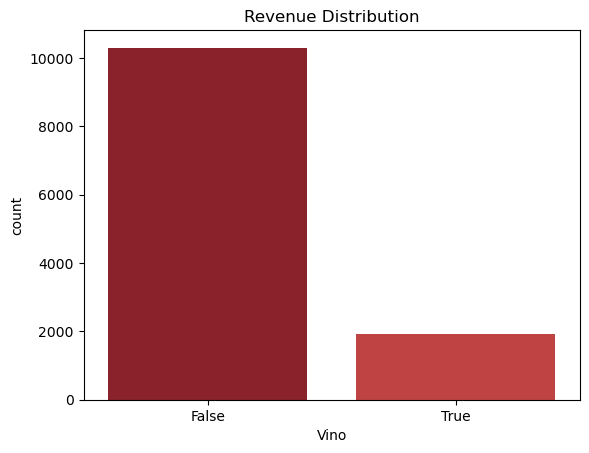

In [30]:
rojo_intenso_palette = ["#9B111E", "#D32F2F", "#C2185B"]  

sns.countplot(data=df, x="Revenue", palette=rojo_intenso_palette)

plt.xlabel("Vino")
plt.title("Revenue Distribution")

plt.show()

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividir en X e y
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# División inicial en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
print("Distribución después de SMOTE:")
print(y_train_balanced.value_counts())

Distribución después de SMOTE:
Revenue
False    8218
True     8218
Name: count, dtype: int64


### Lazy Predict

In [50]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Definir X (características) e y (variable objetivo)
X = df.drop(columns=['Revenue'])  # Reemplaza 'Revenue' por el nombre de tu columna objetivo
y = df['Revenue']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar modelos
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Mostrar resultados ordenados por precisión
print(models)

100%|██████████| 29/29 [00:20<00:00,  1.40it/s]


[LightGBM] [Info] Number of positive: 1546, number of negative: 8218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1881
[LightGBM] [Info] Number of data points in the train set: 9764, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158337 -> initscore=-1.670656
[LightGBM] [Info] Start training from score -1.670656
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.89               0.76     0.76      0.89   
NearestCentroid                    0.82               0.75     0.75      0.83   
XGBClassifier                      0.90               0.75     0.75      0.89   
LGBMClassifier                     0.90 

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Entrenar el modelo
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Predicciones
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2079
        True       0.77      0.38      0.51       362

    accuracy                           0.89      2441
   macro avg       0.83      0.68      0.72      2441
weighted avg       0.88      0.89      0.88      2441

ROC-AUC Score:
0.8957278653411249
Confusion Matrix:
[[2037   42]
 [ 224  138]]


### XGBoost

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2079
        True       0.71      0.58      0.64       362

    accuracy                           0.90      2441
   macro avg       0.82      0.77      0.79      2441
weighted avg       0.90      0.90      0.90      2441

ROC-AUC Score:
0.9336505013300593


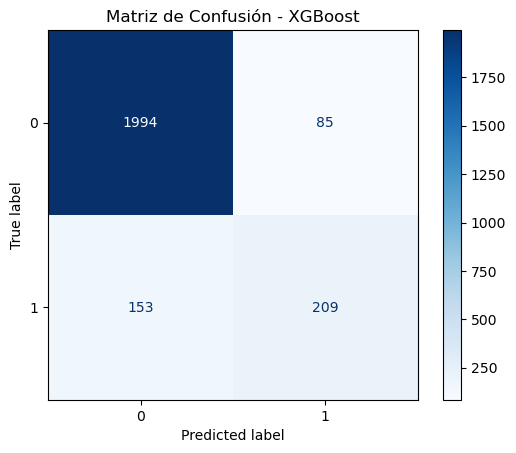

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Entrenar el modelo
xgb_model = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo: Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluar el modelo: ROC-AUC Score
print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xgb_model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - XGBoost")
plt.show()

### Random Forest Classifier 

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      2079
        True       0.74      0.55      0.63       362

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg       0.90      0.90      0.90      2441



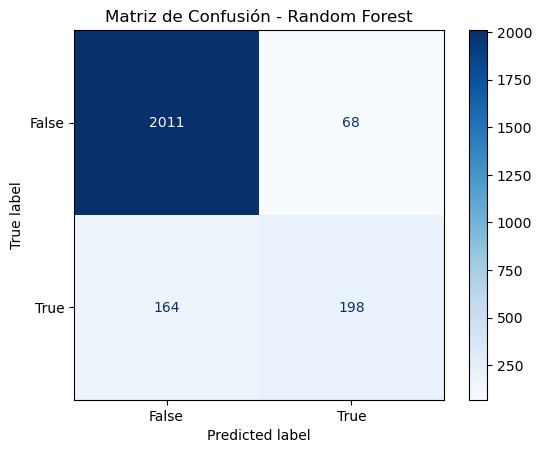

Precisión del modelo: 0.90


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Reporte de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Precisión general
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

### Gradient Boosting

Reporte de Clasificación - Gradient Boosting:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2079
        True       0.72      0.59      0.65       362

    accuracy                           0.90      2441
   macro avg       0.82      0.78      0.80      2441
weighted avg       0.90      0.90      0.90      2441



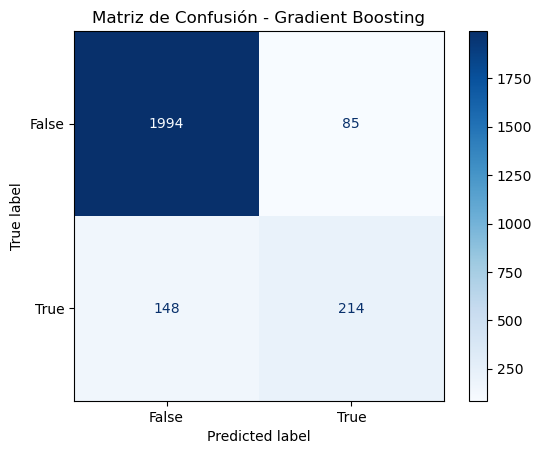

Precisión del modelo: 0.90


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = gb_model.predict(X_test)

# Evaluar el modelo
print("Reporte de Clasificación - Gradient Boosting:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Gradient Boosting")
plt.show()

# Precisión general
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

### Ada Boost 

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.95      0.91      0.93      2079
        True       0.60      0.73      0.66       362

    accuracy                           0.89      2441
   macro avg       0.77      0.82      0.79      2441
weighted avg       0.90      0.89      0.89      2441



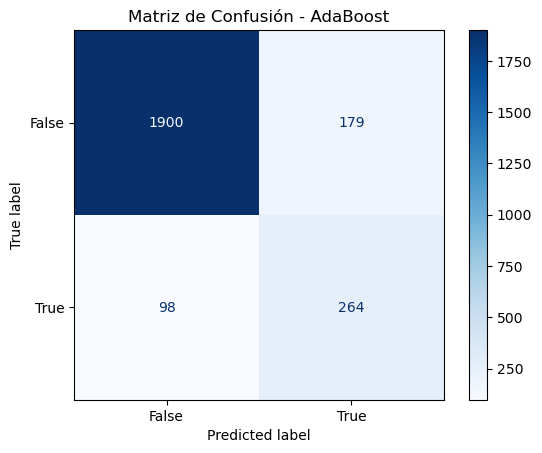

Precisión del modelo: 0.89


In [61]:
X = df.drop(columns=['Revenue'])  # Reemplaza 'Revenue' con el nombre de tu columna objetivo
y = df['Revenue']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (opcional, dependiendo de tu dataset)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear los datos (si están desbalanceados)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Inicializar AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Entrenar el modelo
adaboost.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred = adaboost.predict(X_test_scaled)

# Evaluar el modelo con métricas completas
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=adaboost.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - AdaBoost")
plt.show()

# Precisión general
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

### Nearest Centroid Classifier 

Reporte de Clasificación - Nearest Centroid:
              precision    recall  f1-score   support

       False       0.94      0.84      0.88      2079
        True       0.42      0.70      0.53       362

    accuracy                           0.81      2441
   macro avg       0.68      0.77      0.71      2441
weighted avg       0.86      0.81      0.83      2441



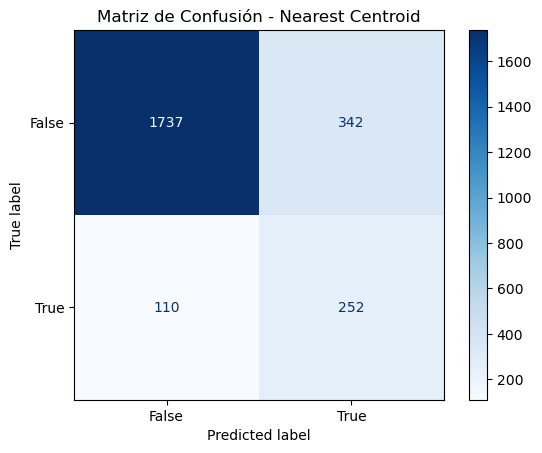

Precisión del modelo: 0.81


In [54]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler

# Definir X (características) e y (variable objetivo)
X = df.drop(columns=['Revenue'])  # Reemplaza 'Revenue' con el nombre de tu columna objetivo
y = df['Revenue']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (Nearest Centroid es sensible a la escala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar el modelo Nearest Centroid
nc_model = NearestCentroid(metric='euclidean')  # También puedes usar 'manhattan' u otras métricas
nc_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = nc_model.predict(X_test_scaled)

# Evaluar el modelo
print("Reporte de Clasificación - Nearest Centroid:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nc_model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Nearest Centroid")
plt.show()

# Precisión general
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

### Ada Boost con Grid Search

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Dividir en características y variable objetivo
X = df.drop(columns=['Revenue'])  # Reemplaza 'Revenue' por tu columna objetivo
y = df['Revenue']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de hiperparámetros para AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],          # Número de clasificadores débiles
    'learning_rate': [0.01, 0.1, 1.0, 10.0], # Tasa de aprendizaje
    'algorithm': ['SAMME', 'SAMME.R']        # Algoritmo a usar
}

# Configurar el Grid Search
grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Métrica a optimizar
    cv=5,                # Validación cruzada (5 pliegues)
    verbose=1,           # Mostrar progreso en consola
    n_jobs=-1            # Usar todos los núcleos disponibles
)

# Entrenar el Grid Search
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación en validación cruzada:", grid_search.best_score_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
Mejor puntuación en validación cruzada: 0.8925652422082881


### Ada Boost con Mejores parametros 

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.95      0.91      0.93      2079
        True       0.60      0.73      0.66       362

    accuracy                           0.89      2441
   macro avg       0.77      0.82      0.79      2441
weighted avg       0.90      0.89      0.89      2441



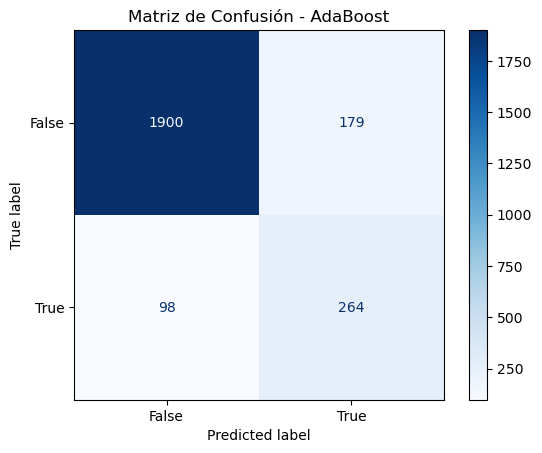

Precisión del modelo: 0.89


In [70]:
X = df.drop(columns=['Revenue'])  # Reemplaza 'Revenue' con el nombre de tu columna objetivo
y = df['Revenue']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (opcional, dependiendo de tu dataset)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear los datos (si están desbalanceados)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Inicializar AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Entrenar el modelo
adaboost.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred = adaboost.predict(X_test_scaled)

# Evaluar el modelo con métricas completas
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=adaboost.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - AdaBoost")
plt.show()

# Precisión general
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")